# 🌍 COVID-19 Global Data Tracker

Welcome to the COVID-19 Global Data Tracker!  
This notebook analyzes global COVID-19 trends—cases, deaths, recoveries, and vaccinations—across countries and time.  
We’ll clean and process real-world data, perform exploratory data analysis (EDA), and visualize trends with modern, beautiful charts.

**Objectives:**
- Import and clean COVID-19 global data
- Analyze time trends (cases, deaths, vaccinations)
- Compare metrics across countries/regions
- Visualize trends with charts and maps
- Communicate findings with narrative insights

*Data Source: [Our World in Data](https://covid.ourworldindata.org/data/owid-covid-data.csv)*

## Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Set global plotting parameters for a modern and professional look
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import seaborn as sns
import plotly.express as px
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import PercentFormatter

# Set modern plotting styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')
sns.set_context('talk')

## 📥 Data Loading

Let’s load the COVID-19 dataset and take a first look at its structure.

In [3]:
# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Show shape and first few rows
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()

Rows: 429435, Columns: 67


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


## 🔍 Data Exploration

Let’s explore the columns, check for missing values, and understand the data types.

In [4]:
# List columns
print("Columns:", df.columns.tolist())

# Check for missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'

weekly_icu_admissions_per_million          418442
weekly_icu_admissions                      418442
excess_mortality_cumulative_per_million    416024
excess_mortality                           416024
excess_mortality_cumulative                416024
                                            ...  
new_deaths                                  18827
total_cases_per_million                     17631
total_deaths_per_million                    17631
total_cases                                 17631
total_deaths                                17631
Length: 63, dtype: int64

In [5]:
# Data types and quick stats
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

,count,mean,std,min,25%,50%,75%,max
total_cases,411804.0,7.365292e+06,4.477582e+07,0.0000,6280.750000,6.365300e+04,7.582720e+05,7.758668e+08
new_cases,410159.0,8.017360e+03,2.296649e+05,0.0000,0.000000,0.000000e+00,0.000000e+00,4.423623e+07
new_cases_smoothed,408929.0,8.041026e+03,8.661611e+04,0.0000,0.000000,1.200000e+01,3.132860e+02,6.319461e+06
total_deaths,411804.0,8.125957e+04,4.411901e+05,0.0000,43.000000,7.990000e+02,9.574000e+03,7.057132e+06
new_deaths,410608.0,7.185214e+01,1.368323e+03,0.0000,0.000000,0.000000e+00,0.000000e+00,1.037190e+05
...,...,...,...,...,...,...,...,...
population,429435.0,1.520336e+08,6.975408e+08,47.0000,523798.000000,6.336393e+06,3.296952e+07,7.975105e+09
excess_mortality_cumulative_absolute,13411.0,5.604765e+04,1.568691e+05,-37726.0980,176.500005,6.815199e+03,3.912804e+04,1.349776e+06
excess_mortality_cumulative,13411.0,9.766431e+00,1.204066e+01,-44.2300,2.060000,8.130000e+00,1.516000e+01,7.808000e+01
excess_mortality,13411.0,1.092535e+01,2.456071e+01,-95.9200,-1.500000,5.660000e+00,1.557500e+01,3.782200e+02


## 🧹 Data Cleaning

We’ll focus on a few countries (e.g., Kenya, USA, India), handle missing values, and ensure correct data types.

In [7]:
# Filter for selected countries
countries = ['Kenya', 'United States', 'India']
df_countries = df[df['location'].isin(countries)].copy()

# Convert 'date' to datetime
df_countries['date'] = pd.to_datetime(df_countries['date'])

# Drop rows with missing critical values (date, total_cases)
df_countries = df_countries.dropna(subset=['date', 'total_cases'])

# Fill missing numeric values with interpolation (forward fill as backup)
num_cols = ['total_cases', 'total_deaths', 'total_vaccinations', 'new_cases', 'new_deaths', 'people_vaccinated', 'people_fully_vaccinated']
df_countries[num_cols] = df_countries[num_cols].interpolate().bfill().ffill()

df_countries.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173550,IND,Asia,India,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173551,IND,Asia,India,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173552,IND,Asia,India,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173553,IND,Asia,India,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN


## 📊 Exploratory Data Analysis (EDA)

Let’s visualize total cases, deaths, and new cases over time for our selected countries.

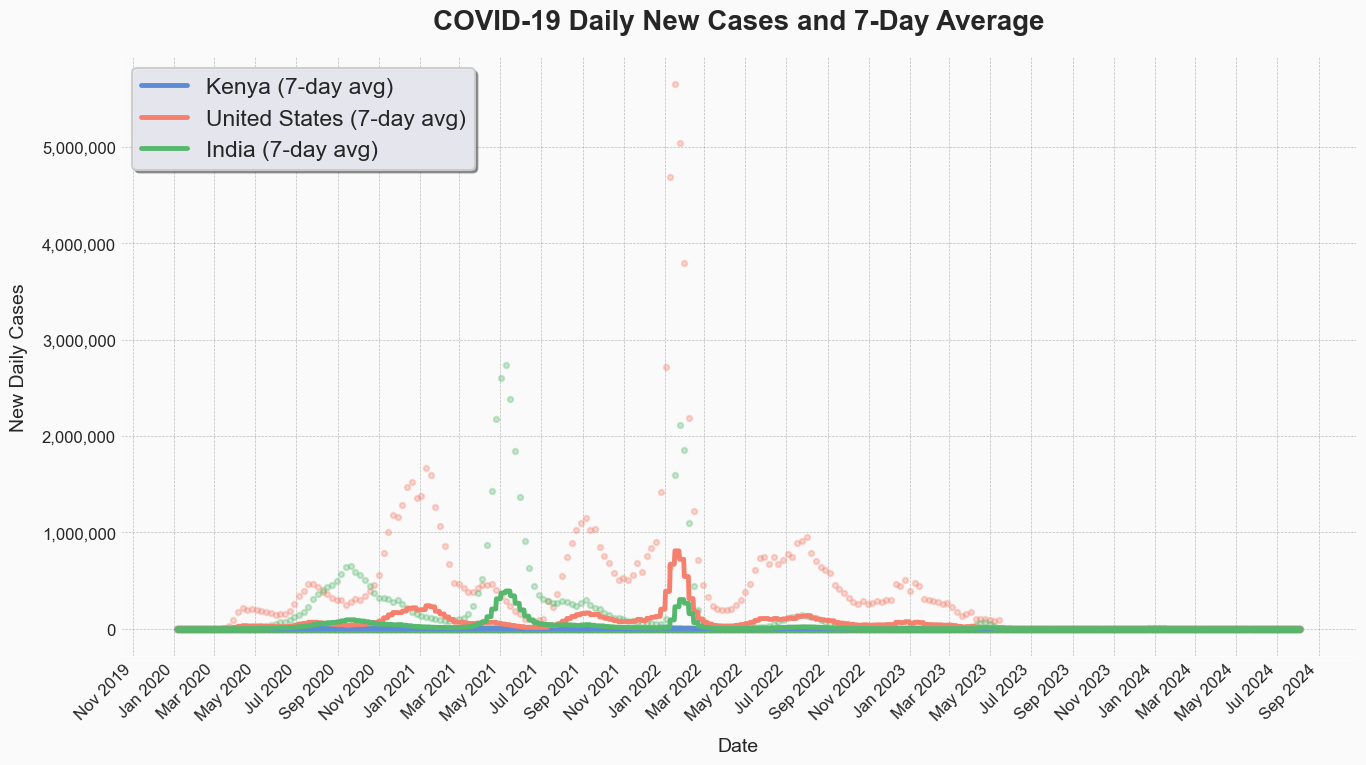

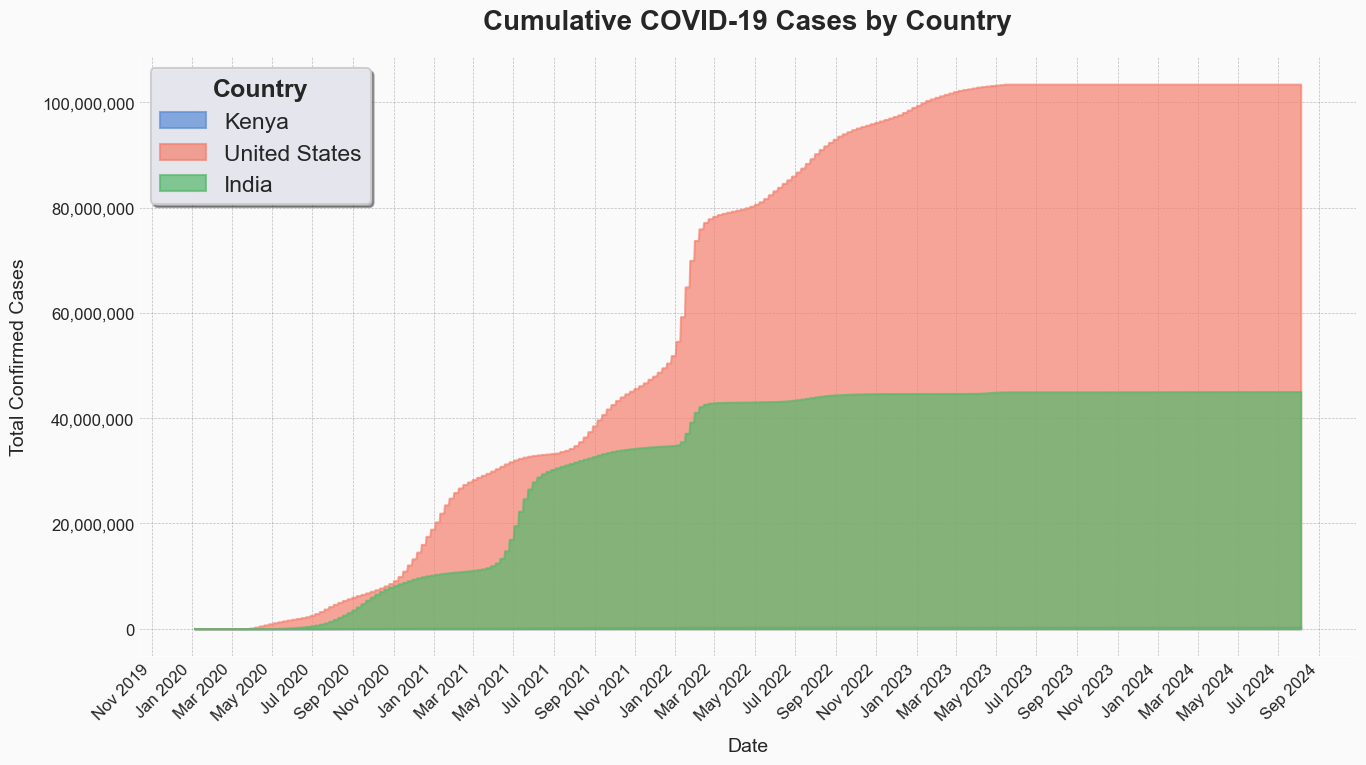

In [19]:
# Define a modern color palette
colors = ['#5A8DD6', '#F4806D', '#55B86C']  # Blue, Coral, Green

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# 1. Line Plot: Daily New Cases with 7-day rolling average (formerly the second plot)
fig, ax = plt.subplots(figsize=(14, 8), facecolor='#fafafa')

for idx, country in enumerate(countries):
    # Create a copy of the slice to avoid the SettingWithCopyWarning
    country_data = df_countries[df_countries['location'] == country].copy()
    
    # Calculate daily new cases (if not already in the dataframe)
    if 'new_cases' not in country_data.columns:
        country_data['new_cases'] = country_data['total_cases'].diff().fillna(0)
    
    # Calculate 7-day rolling average
    country_data['rolling_avg'] = country_data['new_cases'].rolling(window=7).mean()
    
    # Plot rolling average as a solid line
    ax.plot(
        country_data['date'],
        country_data['rolling_avg'],
        label=f"{country} (7-day avg)",
        color=colors[idx],
        linewidth=3.5
    )
    
    # Plot daily cases as light scatter points
    ax.scatter(
        country_data['date'],
        country_data['new_cases'],
        color=colors[idx],
        s=15,
        alpha=0.3
    )

# Improve date formatting on x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Format y-axis with comma separators for thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add title and labels with improved styling
ax.set_title('COVID-19 Daily New Cases and 7-Day Average', fontweight='bold', pad=20)
ax.set_xlabel('Date', labelpad=10)
ax.set_ylabel('New Daily Cases', labelpad=10)

# Create a stylish legend
legend = ax.legend(
    frameon=True,
    fancybox=True,
    framealpha=0.95,
    shadow=True,
    loc='upper left'
)

# Add grid but make it subtle
ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.5, color='gray')

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Add a subtle background color
ax.set_facecolor('#fafafa')

plt.tight_layout()
plt.show()

# 2. Area Plot: Cumulative COVID-19 Cases (formerly the first plot)
fig, ax = plt.subplots(figsize=(14, 8), facecolor='#fafafa')

for idx, country in enumerate(countries):
    country_data = df_countries[df_countries['location'] == country]
    ax.fill_between(
        country_data['date'],
        country_data['total_cases'],
        alpha=0.7,
        color=colors[idx],
        label=country,
        edgecolor=colors[idx],
        linewidth=1.5
    )

# Improve date formatting on x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Format y-axis with comma separators for thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add title and labels with improved styling
ax.set_title('Cumulative COVID-19 Cases by Country', fontweight='bold', pad=20)
ax.set_xlabel('Date', labelpad=10)
ax.set_ylabel('Total Confirmed Cases', labelpad=10)

# Create a stylish legend
legend = ax.legend(
    title='Country', 
    frameon=True,
    fancybox=True,
    framealpha=0.95,
    shadow=True,
    loc='upper left'
)
legend.get_title().set_fontweight('bold')

# Add grid but make it subtle
ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.5, color='gray')

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Add a subtle background color
ax.set_facecolor('#fafafa')

plt.tight_layout()
plt.show()

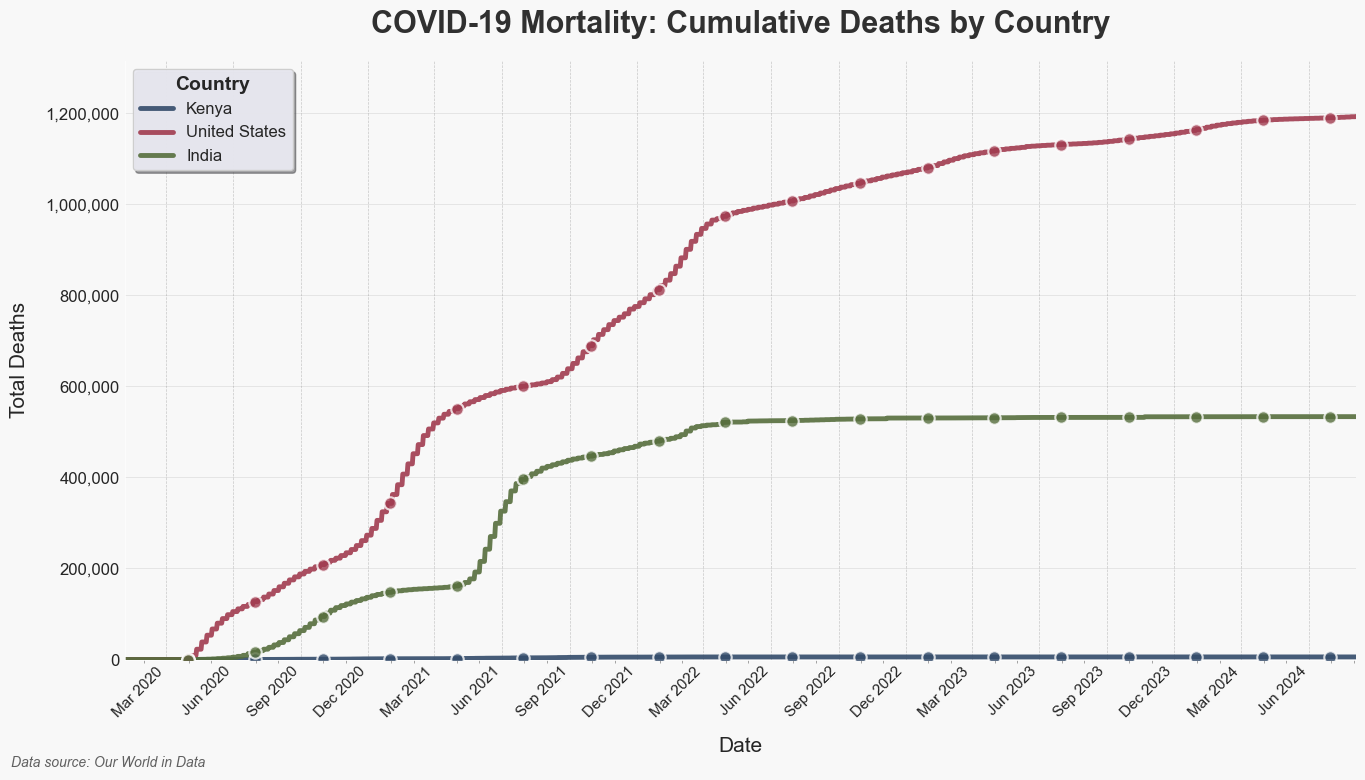

In [23]:
# Create a modern and somber color palette appropriate for death statistics
colors = ['#334B6A', '#A13B4F', '#566E3D']  # Deep blue, burgundy, forest green

# Create figure with subtle background color
fig, ax = plt.subplots(figsize=(14, 8), facecolor='#f8f8f8')
ax.set_facecolor('#f8f8f8')

# Plot each country's data with enhanced styling
for idx, country in enumerate(countries):
    # Create a copy of the data to avoid SettingWithCopyWarning
    country_data = df_countries[df_countries['location'] == country].copy()
    
    # Plot line with enhanced styling
    ax.plot(
        country_data['date'],
        country_data['total_deaths'],
        label=country,
        color=colors[idx % len(colors)],
        linewidth=3.5,
        alpha=0.9
    )
    
    # Add subtle markers at quarterly intervals (instead of monthly)
    # Using 'QE' for quarter-end frequency instead of deprecated 'M'
    quarterly_data = country_data.set_index('date').resample('QE').last().reset_index()
    ax.scatter(
        quarterly_data['date'],
        quarterly_data['total_deaths'],
        color=colors[idx % len(colors)],
        s=80,
        alpha=0.8,
        edgecolor='white',
        linewidth=1.5,
        zorder=5
    )

# Improve date formatting on x-axis - use fewer labels to prevent crowding
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3 months
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)

# Add minor tick marks for better readability
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis='x', which='minor', length=2, color='gray', width=0.5)

# Format y-axis with comma separators for thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add title and labels with improved styling
ax.set_title('COVID-19 Mortality: Cumulative Deaths by Country', 
             fontweight='bold', pad=20, fontsize=22, color='#303030')
ax.set_xlabel('Date', labelpad=12, fontsize=15)
ax.set_ylabel('Total Deaths', labelpad=12, fontsize=15)

# Create a stylish legend with larger text for better readability
legend = ax.legend(
    title='Country', 
    frameon=True,
    fancybox=True,
    framealpha=0.95,
    shadow=True,
    loc='upper left',
    title_fontsize=14,
    fontsize=12,
    edgecolor='#CCCCCC'
)
legend.get_title().set_fontweight('bold')
legend.get_frame().set_linewidth(1)

# Add grid but make it subtle
ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.4, color='gray')

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Add a subtle annotation about the data source
plt.figtext(0.02, 0.02, 'Data source: Our World in Data', 
           fontsize=10, color='#606060', style='italic')

# Add light horizontal lines to make reading values easier
ax.yaxis.grid(True, linestyle='-', alpha=0.2, color='#777777')

# Since there's a huge difference in scale between countries, consider using a log scale
# Uncomment the next line if Kenya's data is too small to be visible
# ax.set_yscale('log')

# Add padding to y-axis to prevent markers from being cut off
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.05)

# Make sure date range is appropriate
ax.set_xlim(
    min(df_countries['date']), 
    max(df_countries['date'])
)

plt.tight_layout()
plt.show()

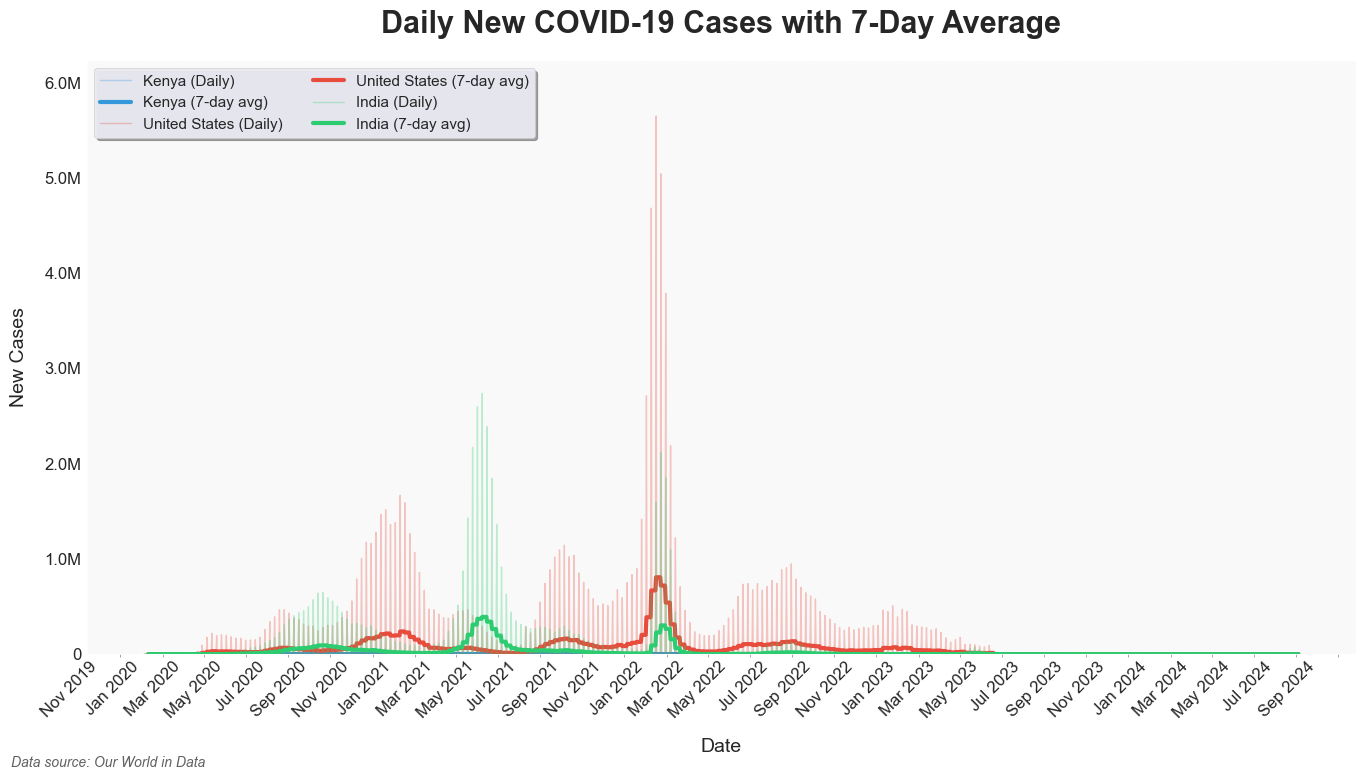

In [26]:
# Create a modern, vibrant color palette
colors = ['#3498db', '#e74c3c', '#2ecc71']  # Vibrant blue, red, green

# Create figure with a clean, modern background
fig, ax = plt.subplots(figsize=(14, 8), facecolor='white')
ax.set_facecolor('#f9f9f9')

# Add a subtle trend line (7-day rolling average) and raw data points
for idx, country in enumerate(countries):
    # Create a copy of the data to avoid SettingWithCopyWarning
    country_data = df_countries[df_countries['location'] == country].copy()
    
    # Calculate 7-day rolling average for smoother visualization
    country_data['rolling_avg'] = country_data['new_cases'].rolling(window=7).mean()
    
    # Plot raw data as semi-transparent line
    ax.plot(
        country_data['date'],
        country_data['new_cases'],
        alpha=0.3,
        color=colors[idx % len(colors)],
        linewidth=1.0,
        label=f"{country} (Daily)"
    )
    
    # Plot rolling average as solid line
    ax.plot(
        country_data['date'],
        country_data['rolling_avg'],
        color=colors[idx % len(colors)],
        linewidth=3.0,
        label=f"{country} (7-day avg)"
    )

# Improve date formatting on x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2 months
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Add minor tick marks for better readability
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis='x', which='minor', length=2, color='gray', width=0.5)

# Format y-axis with comma separators for thousands
def thousands_formatter(x, pos):
    if x >= 1e6:
        return f'{x*1e-6:.1f}M'
    elif x >= 1e3:
        return f'{x*1e-3:.0f}K'
    else:
        return f'{x:.0f}'
        
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add title and labels with improved styling
ax.set_title('Daily New COVID-19 Cases with 7-Day Average', 
             fontweight='bold', pad=20, fontsize=22)
ax.set_xlabel('Date', labelpad=12)
ax.set_ylabel('New Cases', labelpad=12)

# Create a stylish and more readable legend with custom ordering
handles, labels = ax.get_legend_handles_labels()
# Reorder to group by country
ordered_handles = []
ordered_labels = []
for i in range(0, len(handles), 2):
    ordered_handles.extend([handles[i], handles[i+1]])
    ordered_labels.extend([labels[i], labels[i+1]])

legend = ax.legend(
    ordered_handles, 
    ordered_labels,
    frameon=True,
    fancybox=True,
    framealpha=0.95,
    shadow=True,
    ncol=2,  # Two columns for better organization
    loc='upper left',
    fontsize=11
)
legend.get_frame().set_linewidth(0.5)

# Add grid but make it subtle
ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.3)

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Add light horizontal lines to make reading values easier
ax.yaxis.grid(True, linestyle='-', alpha=0.15)

# Add a subtle annotation about the data source
plt.figtext(0.02, 0.02, 'Data source: Our World in Data', 
           fontsize=10, color='#606060', style='italic')

# Ensure y-axis starts at zero
ax.set_ylim(bottom=0)

# Add padding to y-axis to prevent markers from being cut off
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.05)

plt.tight_layout()
plt.show()

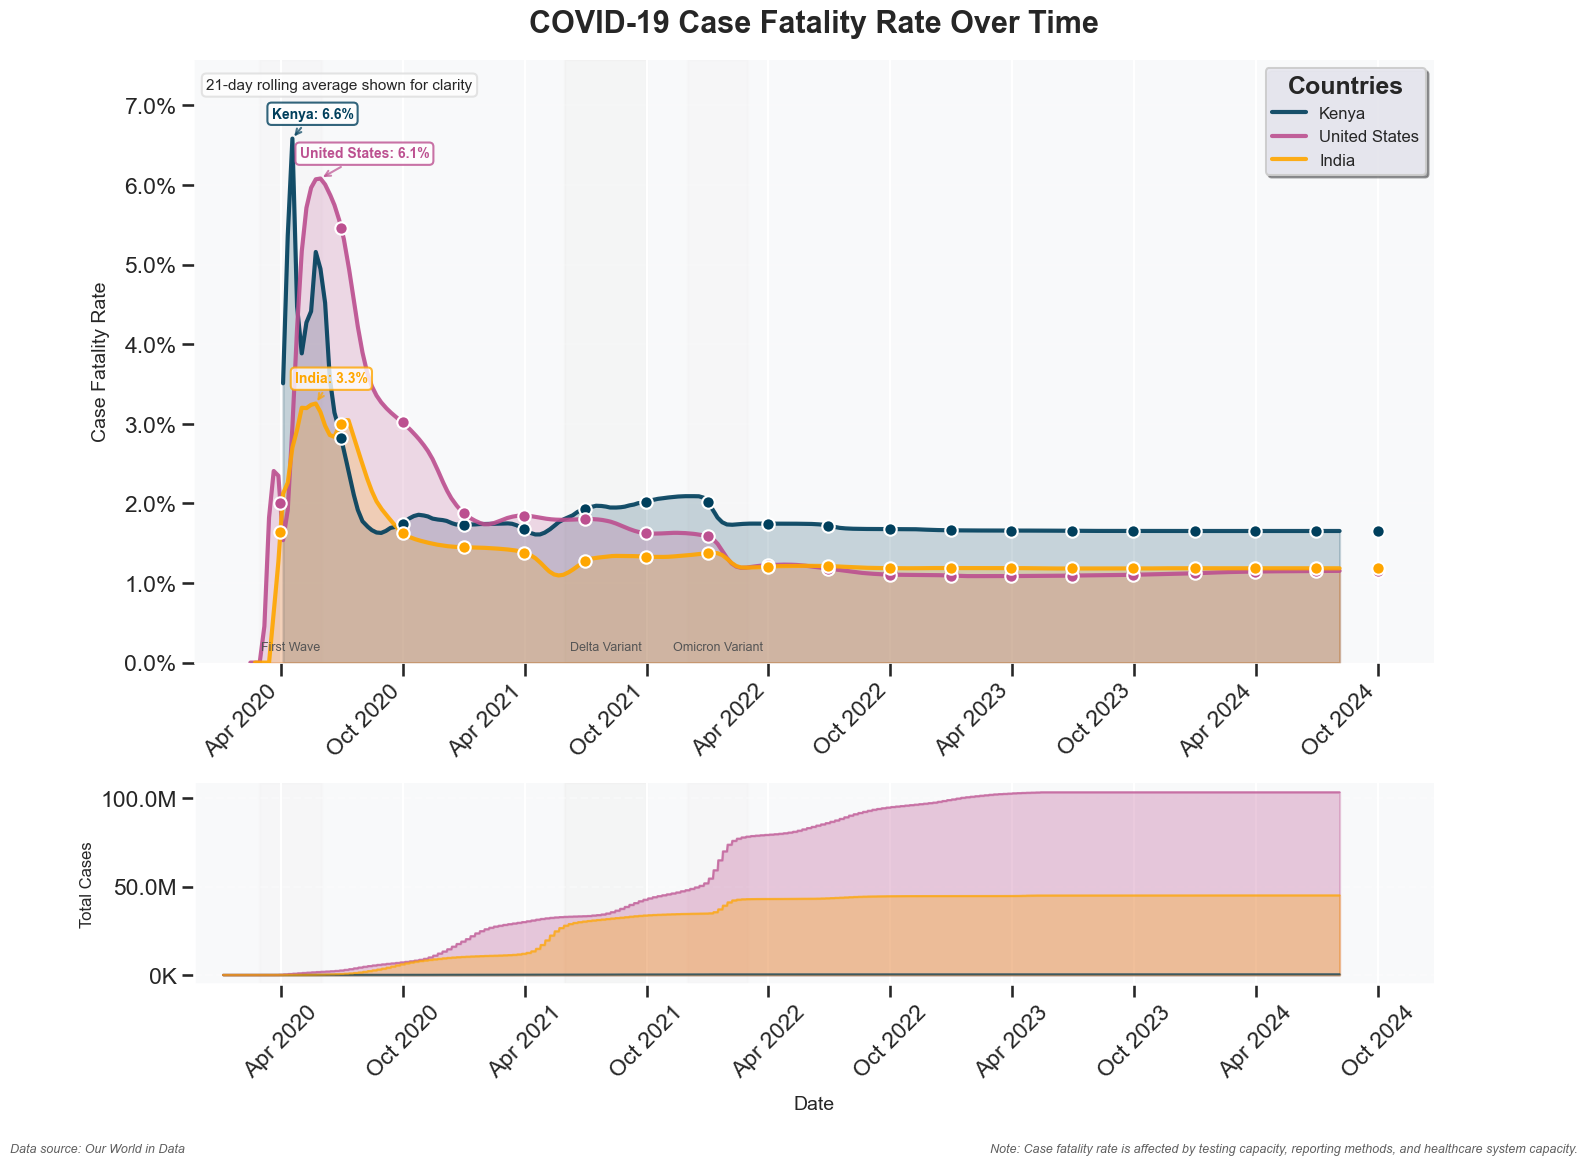

In [33]:
# Create a modern, sophisticated color palette
colors = ['#003f5c', '#bc5090', '#ffa600']  # Navy, magenta, amber

# Assuming countries are defined - make sure this is set before running
countries = ['Kenya', 'United States', 'India']  # Add your countries here

# Create a more complex figure layout using GridSpec with proper spacing
fig = plt.figure(figsize=(16, 12), facecolor='white')  # Increased figure height
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.3)  # Increased space between plots

# Main death rate plot
ax1 = fig.add_subplot(gs[0])
ax1.set_facecolor('#f8f9fa')

# Create list to store data for annotations
max_rates = []

# Plot each country with advanced styling
for idx, country in enumerate(countries):
    # Create a copy of the data to avoid SettingWithCopyWarning
    country_data = df_countries[df_countries['location'] == country].copy()
    
    # Calculate death rate as percentage (careful with division by zero)
    country_data['death_rate'] = country_data['total_deaths'] / country_data['total_cases'].replace(0, np.nan)
    
    # Create a smoothed version (21-day window for better trend visibility)
    country_data['smoothed_rate'] = country_data['death_rate'].rolling(window=21).mean()
    
    # Area fill from 0 to line with gradient alpha
    ax1.fill_between(
        country_data['date'], 
        0, 
        country_data['smoothed_rate'],
        alpha=0.2,
        color=colors[idx % len(colors)]
    )
    
    # Main line with enhanced styling
    line, = ax1.plot(
        country_data['date'],
        country_data['smoothed_rate'],
        label=country,
        color=colors[idx % len(colors)],
        linewidth=3,
        alpha=0.9
    )
    
    # Add scatter points at quarterly intervals for emphasis
    quarterly_data = country_data.copy()
    quarterly_data = quarterly_data.set_index('date').resample('QE').last().reset_index()
    
    ax1.scatter(
        quarterly_data['date'],
        quarterly_data['smoothed_rate'],
        color=colors[idx % len(colors)],
        s=80,
        zorder=5,
        edgecolor='white',
        linewidth=1.5
    )
    
    # Store max rate and date for possible annotation
    valid_data = country_data.dropna(subset=['smoothed_rate'])
    if not valid_data.empty:
        max_idx = valid_data['smoothed_rate'].idxmax()
        max_rate = valid_data.loc[max_idx, 'smoothed_rate']
        max_date = valid_data.loc[max_idx, 'date']
        max_rates.append((country, max_date, max_rate, colors[idx % len(colors)]))

# Format y-axis as percentage
ax1.yaxis.set_major_formatter(PercentFormatter(1.0))

# Set better y-limits with some padding
max_y = max([r[2] for r in max_rates]) if max_rates else 0.1
ax1.set_ylim(0, max_y * 1.15)  # Add 15% padding

# Improve date formatting - reduce frequency of ticks to prevent overlapping
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Changed from 3 to 6 months
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Clean up axis appearance
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['bottom'].set_linewidth(0.5)

# Add title and labels with improved styling
ax1.set_title('COVID-19 Case Fatality Rate Over Time', 
             fontweight='bold', fontsize=22, pad=20)
ax1.set_ylabel('Case Fatality Rate', fontweight='medium', fontsize=14, labelpad=10)

# Add grid for better readability
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.yaxis.grid(True, linestyle='-', alpha=0.15)

# Create stylish legend
legend = ax1.legend(
    title="Countries",
    frameon=True,
    fancybox=True,
    framealpha=0.95,
    shadow=True,
    loc='upper right', 
    fontsize=12
)
legend.get_title().set_fontweight('bold')

# Add annotations for peak death rates
for country, max_date, max_rate, color in max_rates:
    # Only annotate if the rate is significant (adjust threshold as needed)
    if max_rate > 0.02:  # 2% threshold
        ax1.annotate(
            f'{country}: {max_rate:.1%}',
            xy=(max_date, max_rate),
            xytext=(-15, 15),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color=color, alpha=0.7),
            fontsize=10,
            color=color,
            fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", fc='white', ec=color, alpha=0.8)
        )

# Add explanatory text
ax1.text(
    0.01, 0.97, 
    "21-day rolling average shown for clarity",
    transform=ax1.transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='#dddddd')
)

# Add a context mini-plot showing total cases below the main plot
ax2 = fig.add_subplot(gs[1])  # Removed sharex to allow independent formatting
ax2.set_facecolor('#f8f9fa')

# Set the same x-limits manually to ensure alignment
ax2.set_xlim(ax1.get_xlim())

for idx, country in enumerate(countries):
    country_data = df_countries[df_countries['location'] == country].copy()
    ax2.fill_between(
        country_data['date'],
        0,
        country_data['total_cases'],
        alpha=0.3,
        color=colors[idx % len(colors)],
        label=country
    )
    ax2.plot(
        country_data['date'],
        country_data['total_cases'],
        color=colors[idx % len(colors)],
        linewidth=1.5,
        alpha=0.7
    )

# Format the mini plot
ax2.set_ylabel('Total Cases', fontsize=12)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))
ax2.set_xlabel('Date', fontsize=14, labelpad=10)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Use the same date formatting as the top plot but with reduced frequency
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Also changed to 6 months
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.3)

# Add subtle background shading for key pandemic phases (customize based on actual events)
# Example: Initial wave, Delta variant, Omicron variant
phases = [
    {"start": pd.Timestamp("2020-03-01"), "end": pd.Timestamp("2020-06-01"), "name": "First Wave", "color": "#eeeeee"},
    {"start": pd.Timestamp("2021-06-01"), "end": pd.Timestamp("2021-10-01"), "name": "Delta Variant", "color": "#e5e5e5"},
    {"start": pd.Timestamp("2021-12-01"), "end": pd.Timestamp("2022-03-01"), "name": "Omicron Variant", "color": "#eeeeee"}
]

for phase in phases:
    # Add shading to both plots
    for ax in [ax1, ax2]:
        ax.axvspan(phase["start"], phase["end"], alpha=0.2, color=phase["color"], zorder=0)
        
        # Only add text label to main plot
        if ax == ax1:
            mid_point = phase["start"] + (phase["end"] - phase["start"])/2
            ax.text(
                mid_point, 0.02, 
                phase["name"], 
                ha='center', 
                fontsize=9, 
                color='#555555',
                transform=ax.get_xaxis_transform()
            )

# Add a data source note
plt.figtext(0.01, 0.01, "Data source: Our World in Data", 
           fontsize=9, color='#606060', style='italic')

# Add interpretive note
plt.figtext(
    0.99, 0.01, 
    "Note: Case fatality rate is affected by testing capacity, reporting methods, and healthcare system capacity.", 
    fontsize=9, color='#606060', style='italic', ha='right'
)

# Don't use tight_layout() since it's causing issues
# Instead use subplots_adjust to manually set the spacing
plt.subplots_adjust(bottom=0.15, top=0.92, hspace=0.4)

plt.show()

## 💉 Vaccination Progress

Let’s analyze and visualize vaccination rollouts for our selected countries.

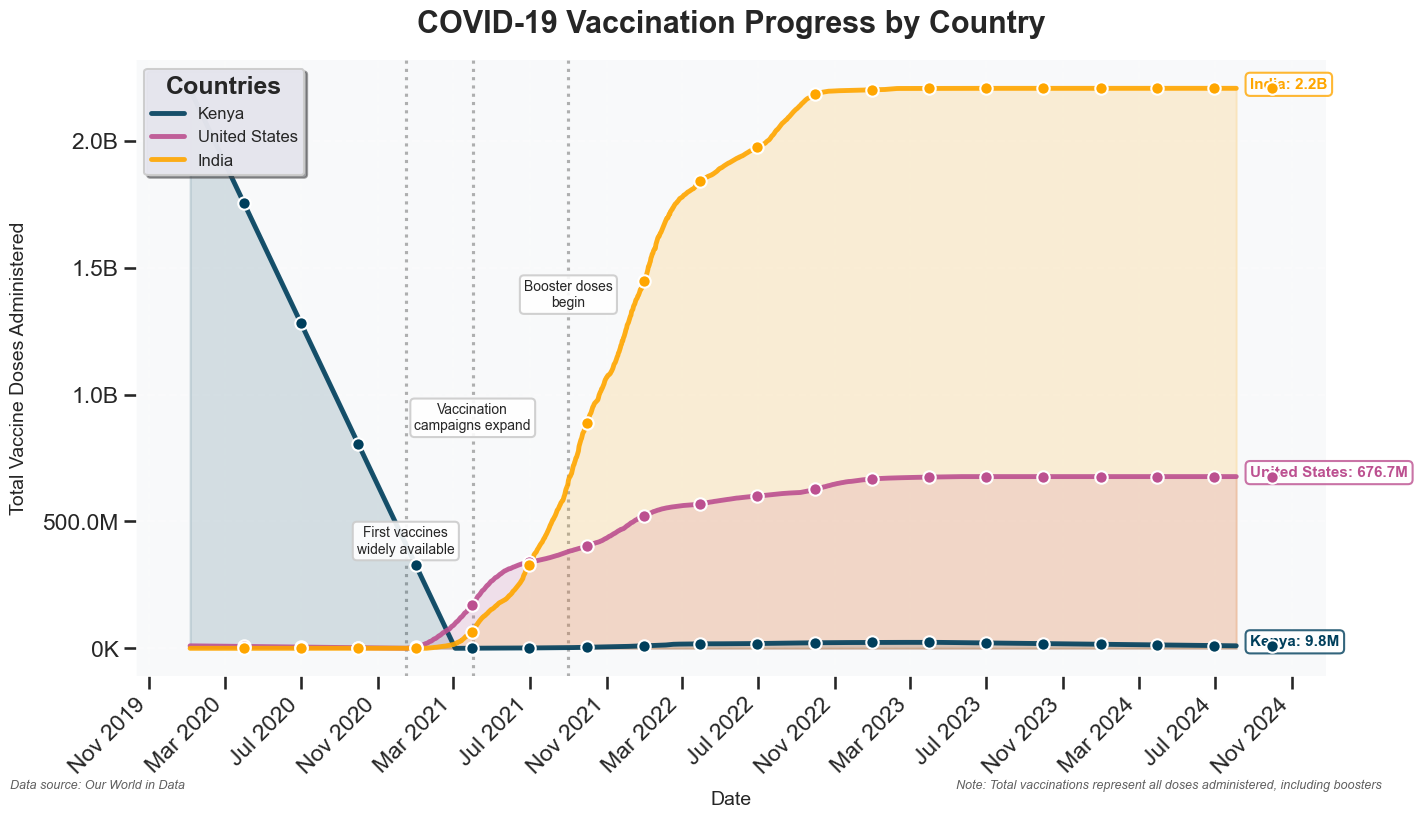

In [35]:
# Create a more sophisticated color palette (same as previous chart for consistency)
colors = ['#003f5c', '#bc5090', '#ffa600']  # Navy, magenta, amber

# Create a larger figure with white background for a cleaner look
plt.figure(figsize=(14, 8), facecolor='white')
ax = plt.subplot(111)
ax.set_facecolor('#f8f9fa')  # Light gray background for the plot area

# Add a subtle grid to help with readability
ax.grid(axis='y', linestyle='--', alpha=0.3, zorder=0)
ax.grid(axis='x', linestyle='--', alpha=0.2, zorder=0)

# Plot each country with enhanced styling
for idx, country in enumerate(countries):
    country_data = df_countries[df_countries['location'] == country].copy()
    
    # Create smooth line
    line, = ax.plot(
        country_data['date'],
        country_data['total_vaccinations'],
        label=country,
        color=colors[idx % len(colors)],
        linewidth=3.5,
        alpha=0.9,
        zorder=3
    )
    
    # Add light area fill beneath each line
    ax.fill_between(
        country_data['date'], 
        0, 
        country_data['total_vaccinations'],
        alpha=0.15,
        color=colors[idx % len(colors)],
        zorder=2
    )
    
    # Add markers at quarterly intervals
    quarterly_data = country_data.copy()
    quarterly_data = quarterly_data.set_index('date').resample('QE').last().reset_index()
    
    ax.scatter(
        quarterly_data['date'],
        quarterly_data['total_vaccinations'],
        color=colors[idx % len(colors)],
        s=80,
        zorder=4,
        edgecolor='white',
        linewidth=1.5
    )
    
    # Annotate the final value
    last_date = country_data['date'].iloc[-1]
    last_value = country_data['total_vaccinations'].iloc[-1]
    
    if not pd.isna(last_value):
        if last_value >= 1e9:
            value_text = f"{last_value/1e9:.1f}B"
        elif last_value >= 1e6:
            value_text = f"{last_value/1e6:.1f}M"
        else:
            value_text = f"{last_value/1e3:.0f}K"
            
        ax.annotate(
            f"{country}: {value_text}",
            xy=(last_date, last_value),
            xytext=(10, 0),
            textcoords="offset points",
            fontsize=11,
            fontweight='bold',
            color=colors[idx % len(colors)],
            bbox=dict(boxstyle="round,pad=0.3", fc='white', ec=colors[idx % len(colors)], alpha=0.8)
        )

# Add key milestone annotations (example - adjust dates as needed for your data)
milestones = [
    {"date": pd.Timestamp("2020-12-15"), "text": "First vaccines\nwidely available", "y_pos": 0.2},
    {"date": pd.Timestamp("2021-04-01"), "text": "Vaccination\ncampaigns expand", "y_pos": 0.4},
    {"date": pd.Timestamp("2021-09-01"), "text": "Booster doses\nbegin", "y_pos": 0.6}
]

y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
for milestone in milestones:
    ax.axvline(milestone["date"], color='#666666', linestyle=':', alpha=0.5, zorder=1)
    ax.text(
        milestone["date"], 
        ax.get_ylim()[0] + y_range * milestone["y_pos"],
        milestone["text"],
        ha='center',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='#cccccc', alpha=0.9)
    )

# Format x-axis dates nicely
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Show every 4 months
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Format y-axis with millions/billions formatter
def millions_formatter(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.0f}K'

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Clean up axis appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Add a more professional title and labels
plt.title('COVID-19 Vaccination Progress by Country', 
         fontweight='bold', fontsize=22, pad=20)
plt.xlabel('Date', fontweight='medium', fontsize=14, labelpad=10)
plt.ylabel('Total Vaccine Doses Administered', fontweight='medium', fontsize=14, labelpad=10)

# Create an enhanced legend
legend = plt.legend(
    title="Countries",
    frameon=True,
    fancybox=True,
    framealpha=0.95,
    shadow=True,
    loc='upper left',
    fontsize=12
)
legend.get_title().set_fontweight('bold')

# Add explanatory footer notes
plt.figtext(0.01, 0.01, "Data source: Our World in Data", 
           fontsize=9, color='#606060', style='italic')

plt.figtext(
    0.99, 0.01, 
    "Note: Total vaccinations represent all doses administered, including boosters", 
    fontsize=9, color='#606060', style='italic', ha='right'
)

# Adjust layout 
plt.subplots_adjust(bottom=0.15, left=0.1, right=0.95, top=0.92)

plt.show()

In [36]:
# Percentage of population vaccinated (latest available)
latest = df_countries.sort_values('date').groupby('location').tail(1)
latest[['location', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']]

,location,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
196995,Kenya,NaN,NaN
175222,India,72.5,67.18
405124,United States,NaN,NaN


## 📤 Export

You can export this notebook as a PDF or HTML for sharing or presentation.Report by Javan Meshack